In [1]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import cm
import seaborn as sns
import funs
from scipy.stats.stats import pearsonr
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
# Se define un límite para las filas de los dataframes que se presenten en el notebook
pd.options.display.max_rows = 10

C:\Users\Jergb\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


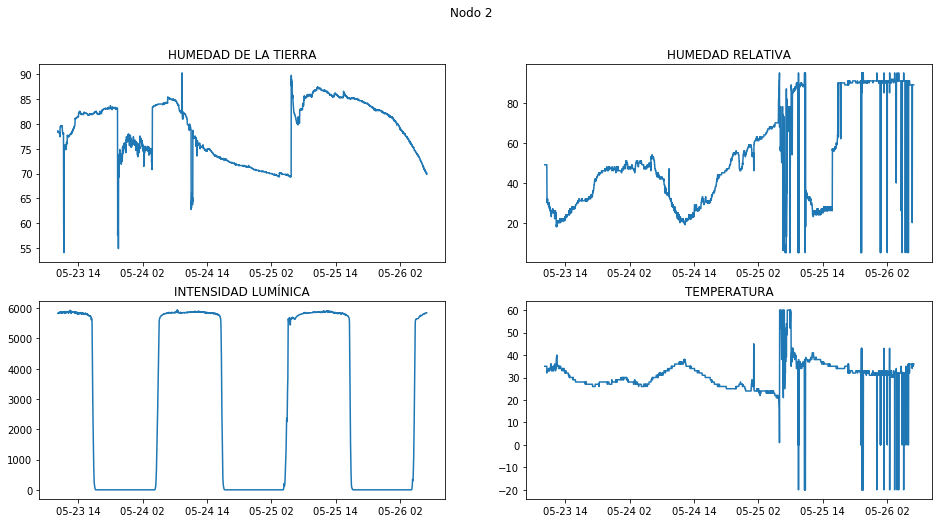

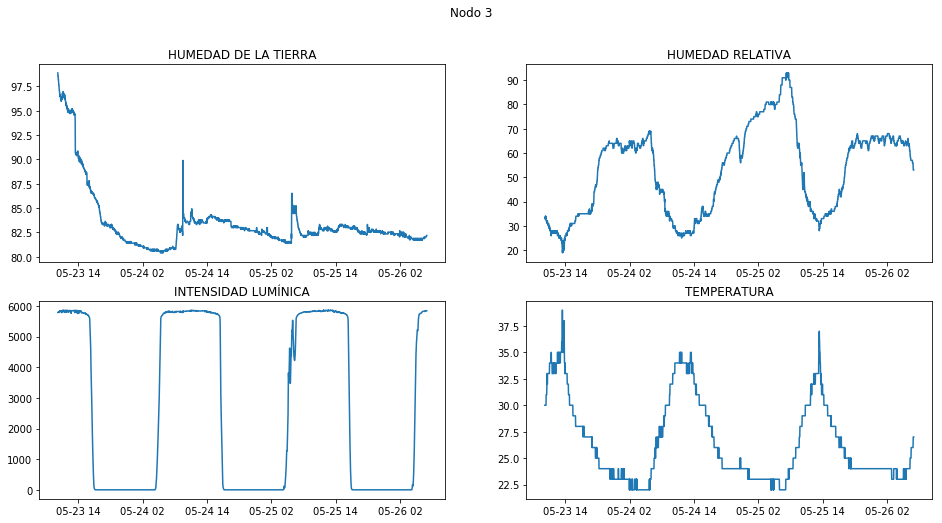

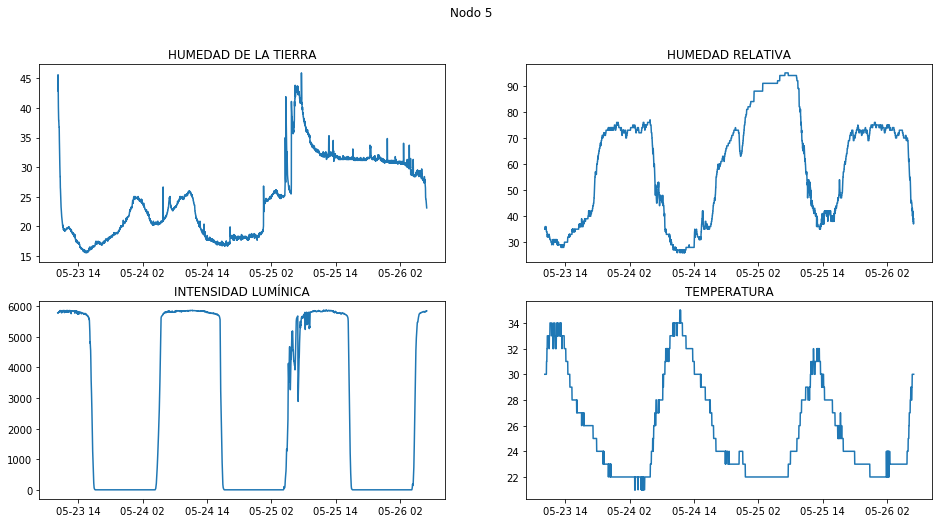

In [2]:
plt.rcParams['figure.figsize'] = [16, 8]
periodo = 2
nodosp={}
for i in [2,3,5]:
    nodosp[i] = pd.read_csv('nodo%d_periodo%d.csv'%(i,periodo),
                                           parse_dates=True,index_col=0)
    plt.figure()
    plt.suptitle('Nodo %d'%i)
    for pos,variable in enumerate(nodosp[i]):
        plt.subplot(2,2,pos+1)
        plt.plot(nodosp[i].loc[:,variable])
        plt.title('%s'%variable)

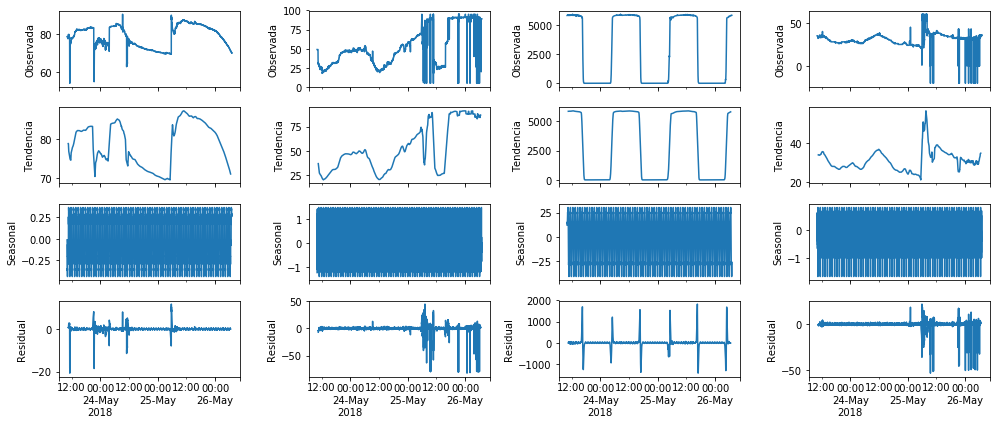

In [3]:
nodo = nodosp[2]
col = 4
inicio = str(nodo.index.year[0])+'-'+str(nodo.index.month[0])+'-'+str(nodo.index.day[0])
fin = str(nodo.index.year[-1])+'-'+str(nodo.index.month[-1])+'-'+str(nodo.index.day[-1])

# Ejemplo de descomposición de serie de tiempo
fig, axes = plt.subplots(ncols=4, nrows=4, sharex=True, figsize=(14,6))

def plotseasonal(res, axes ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observada')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Tendencia')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

for pos, var in enumerate(nodo):
    des = sm.tsa.seasonal_decompose(nodo.loc[:,var],
                                               model='additive', freq=60)  

    plotseasonal(des, axes[:,pos])
    plt.tight_layout()

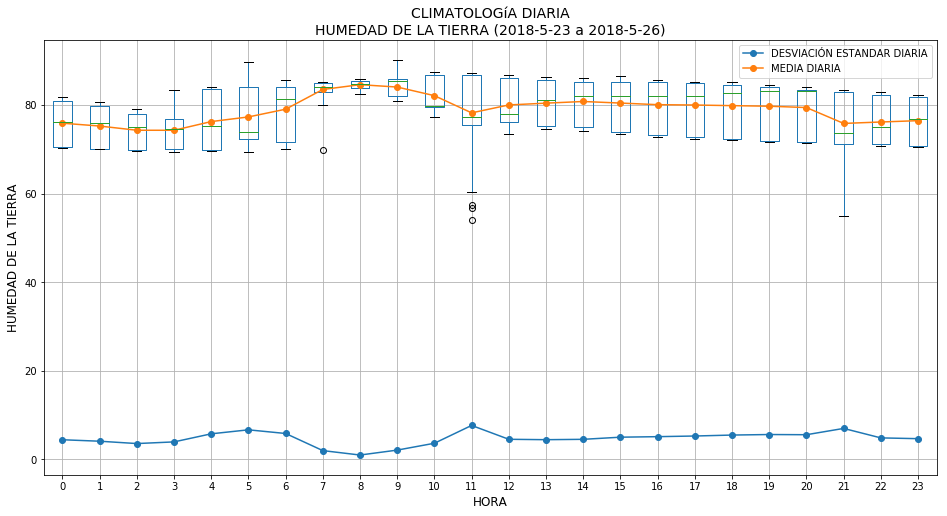

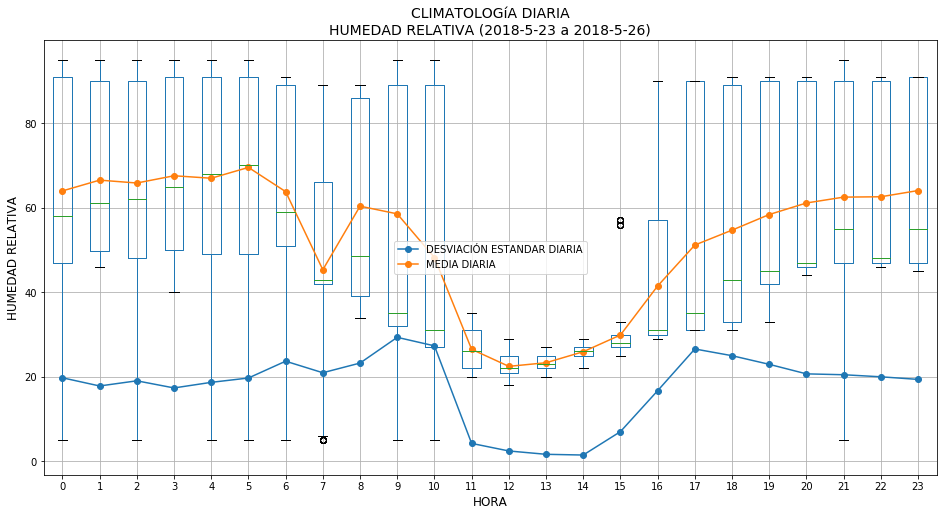

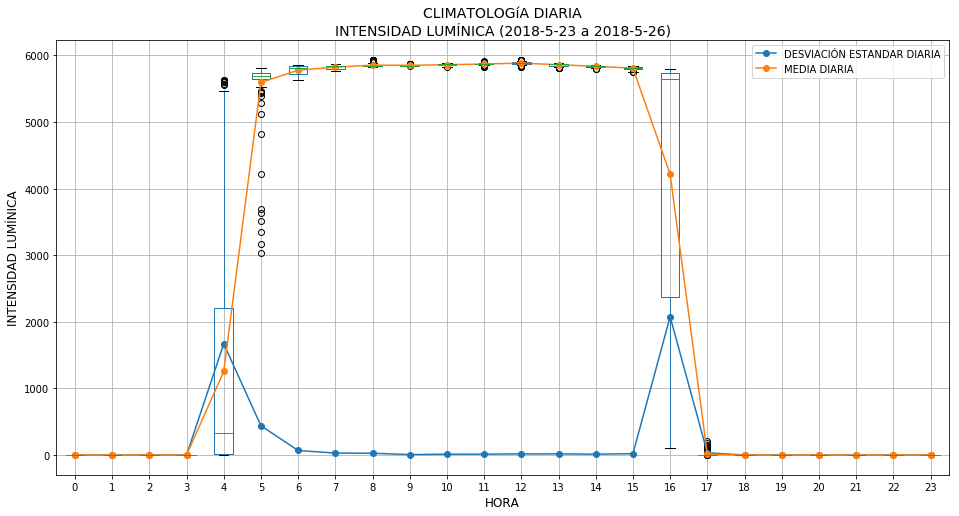

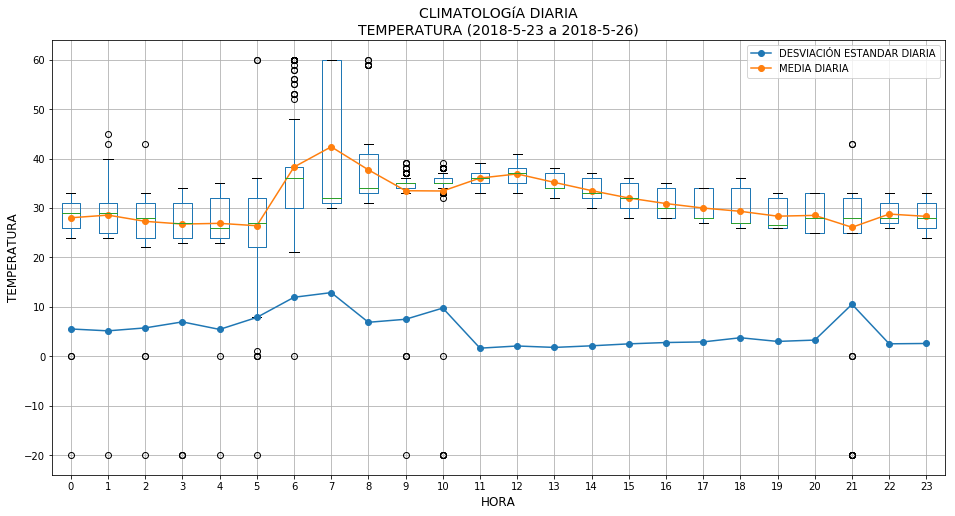

In [4]:
for var in nodo:
    c = max([nodo.loc[:,var][nodo.index.hour==h].count() for h in range(12)])
    
    temp = pd.DataFrame(index=range(c))
    
    for h in range(24):
        temp[h] = pd.Series(nodo.loc[:,var][nodo.index.hour==h].values)
    det = temp.describe()
    
    plt.figure()
    temp.boxplot()
    plt.plot(range(1,25),det.loc['std',:],'-o',label='DESVIACIÓN ESTANDAR DIARIA')
    plt.plot(range(1,25),det.loc['mean',:],'-o',label='MEDIA DIARIA')
    plt.legend()
    plt.xlabel('HORA',fontsize=12)
    plt.ylabel('%s'%var,fontsize=12)
    plt.title('CLIMATOLOGíA DIARIA\n%s (%s a %s)'%(var,inicio,fin),fontsize=14)
    #plt.savefig('plot_%s.png'%nodo.columns[col], dpi=300)

# Falta hacer a media horaria diaria, reducir cada día a 24 valores medios y hacer la climatologia para eso.

# Analizar la climatologia simultanea de los nodos.....